<a href="https://colab.research.google.com/github/xiaonanY0317/527-Project/blob/main/final_of_predict_IBM_Employees_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Influence Factors of IBM Employees Attrition
What will bring if an Organization facing high Attrtion:
1.   Expensive in terms of both money and time to train new employees.
2.   Loss of experienced employees
3.   Impact in productivity
4.   Impact profit

What we plan to do?
1.   Data Cleaning
2.   Exploratory Data Analysis
3.   Data Modeling and model comparison
4.   Model parameter optimization
5.   Verification, Testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from mlxtend.feature_selection import SequentialFeatureSelector
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.neighbors import LocalOutlierFactor

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_recall_fscore_support,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import IsolationForest

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV


### **Exploratory** **Data** **Analysis**

### Data description

In [2]:
#Import Dataset
data_url = "https://drive.google.com/uc?id={}".format("1QQr8WzF21yb2Z7N1vmf2Sqsx_mU2TPJZ")
data = pd.read_csv(data_url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
pd.pandas.set_option('display.max_columns', None)
data.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   
5                        4    Male          79               3         1   
6                        3  Female          81               4         1   
7                        4    Male          67               3         1   
8                        4    Male          44               2         3   
9                        3    Male          94               3         2   

                     JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0            Sales Executive                4        Single           5993   
1         Research Scientist                2       Married           5130   
2      Laboratory Technician                3        Single           2090   
3         Research Scientist                3       Married           2909   
4      Laboratory Technician                2       Married           3468   
5      Laboratory Technician                4        Single           3068   
6      Laboratory Technician                1       Married           2670   
7      Laboratory Technician                3      Divorced           2693   
8     Manufacturing Director                3        Single           9526   
9  Healthcare Representative                3       Married           5237   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   
5        11864                   0      Y       No                 13   
6         9964                   4      Y      Yes                 20   
7        13335             

In [4]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [5]:
# check the unique values for each columns.
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}", "\n")

Age: Number of unique values 43 

Attrition: Number of unique values 2 

BusinessTravel: Number of unique values 3 

DailyRate: Number of unique values 886 

Department: Number of unique values 3 

DistanceFromHome: Number of unique values 29 

Education: Number of unique values 5 

EducationField: Number of unique values 6 

EmployeeCount: Number of unique values 1 

EmployeeNumber: Number of unique values 1470 

EnvironmentSatisfaction: Number of unique values 4 

Gender: Number of unique values 2 

HourlyRate: Number of unique values 71 

JobInvolvement: Number of unique values 4 

JobLevel: Number of unique values 5 

JobRole: Number of unique values 9 

JobSatisfaction: Number of unique values 4 

MaritalStatus: Number of unique values 3 

MonthlyIncome: Number of unique values 1349 

MonthlyRate: Number of unique values 1427 

NumCompaniesWorked: Number of unique values 10 

Over18: Number of unique values 1 

OverTime: Number of unique values 2 

PercentSalaryHike: Number of uni

In [6]:
# drop columns with only one valaue and with unique value to every row.
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [7]:
data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

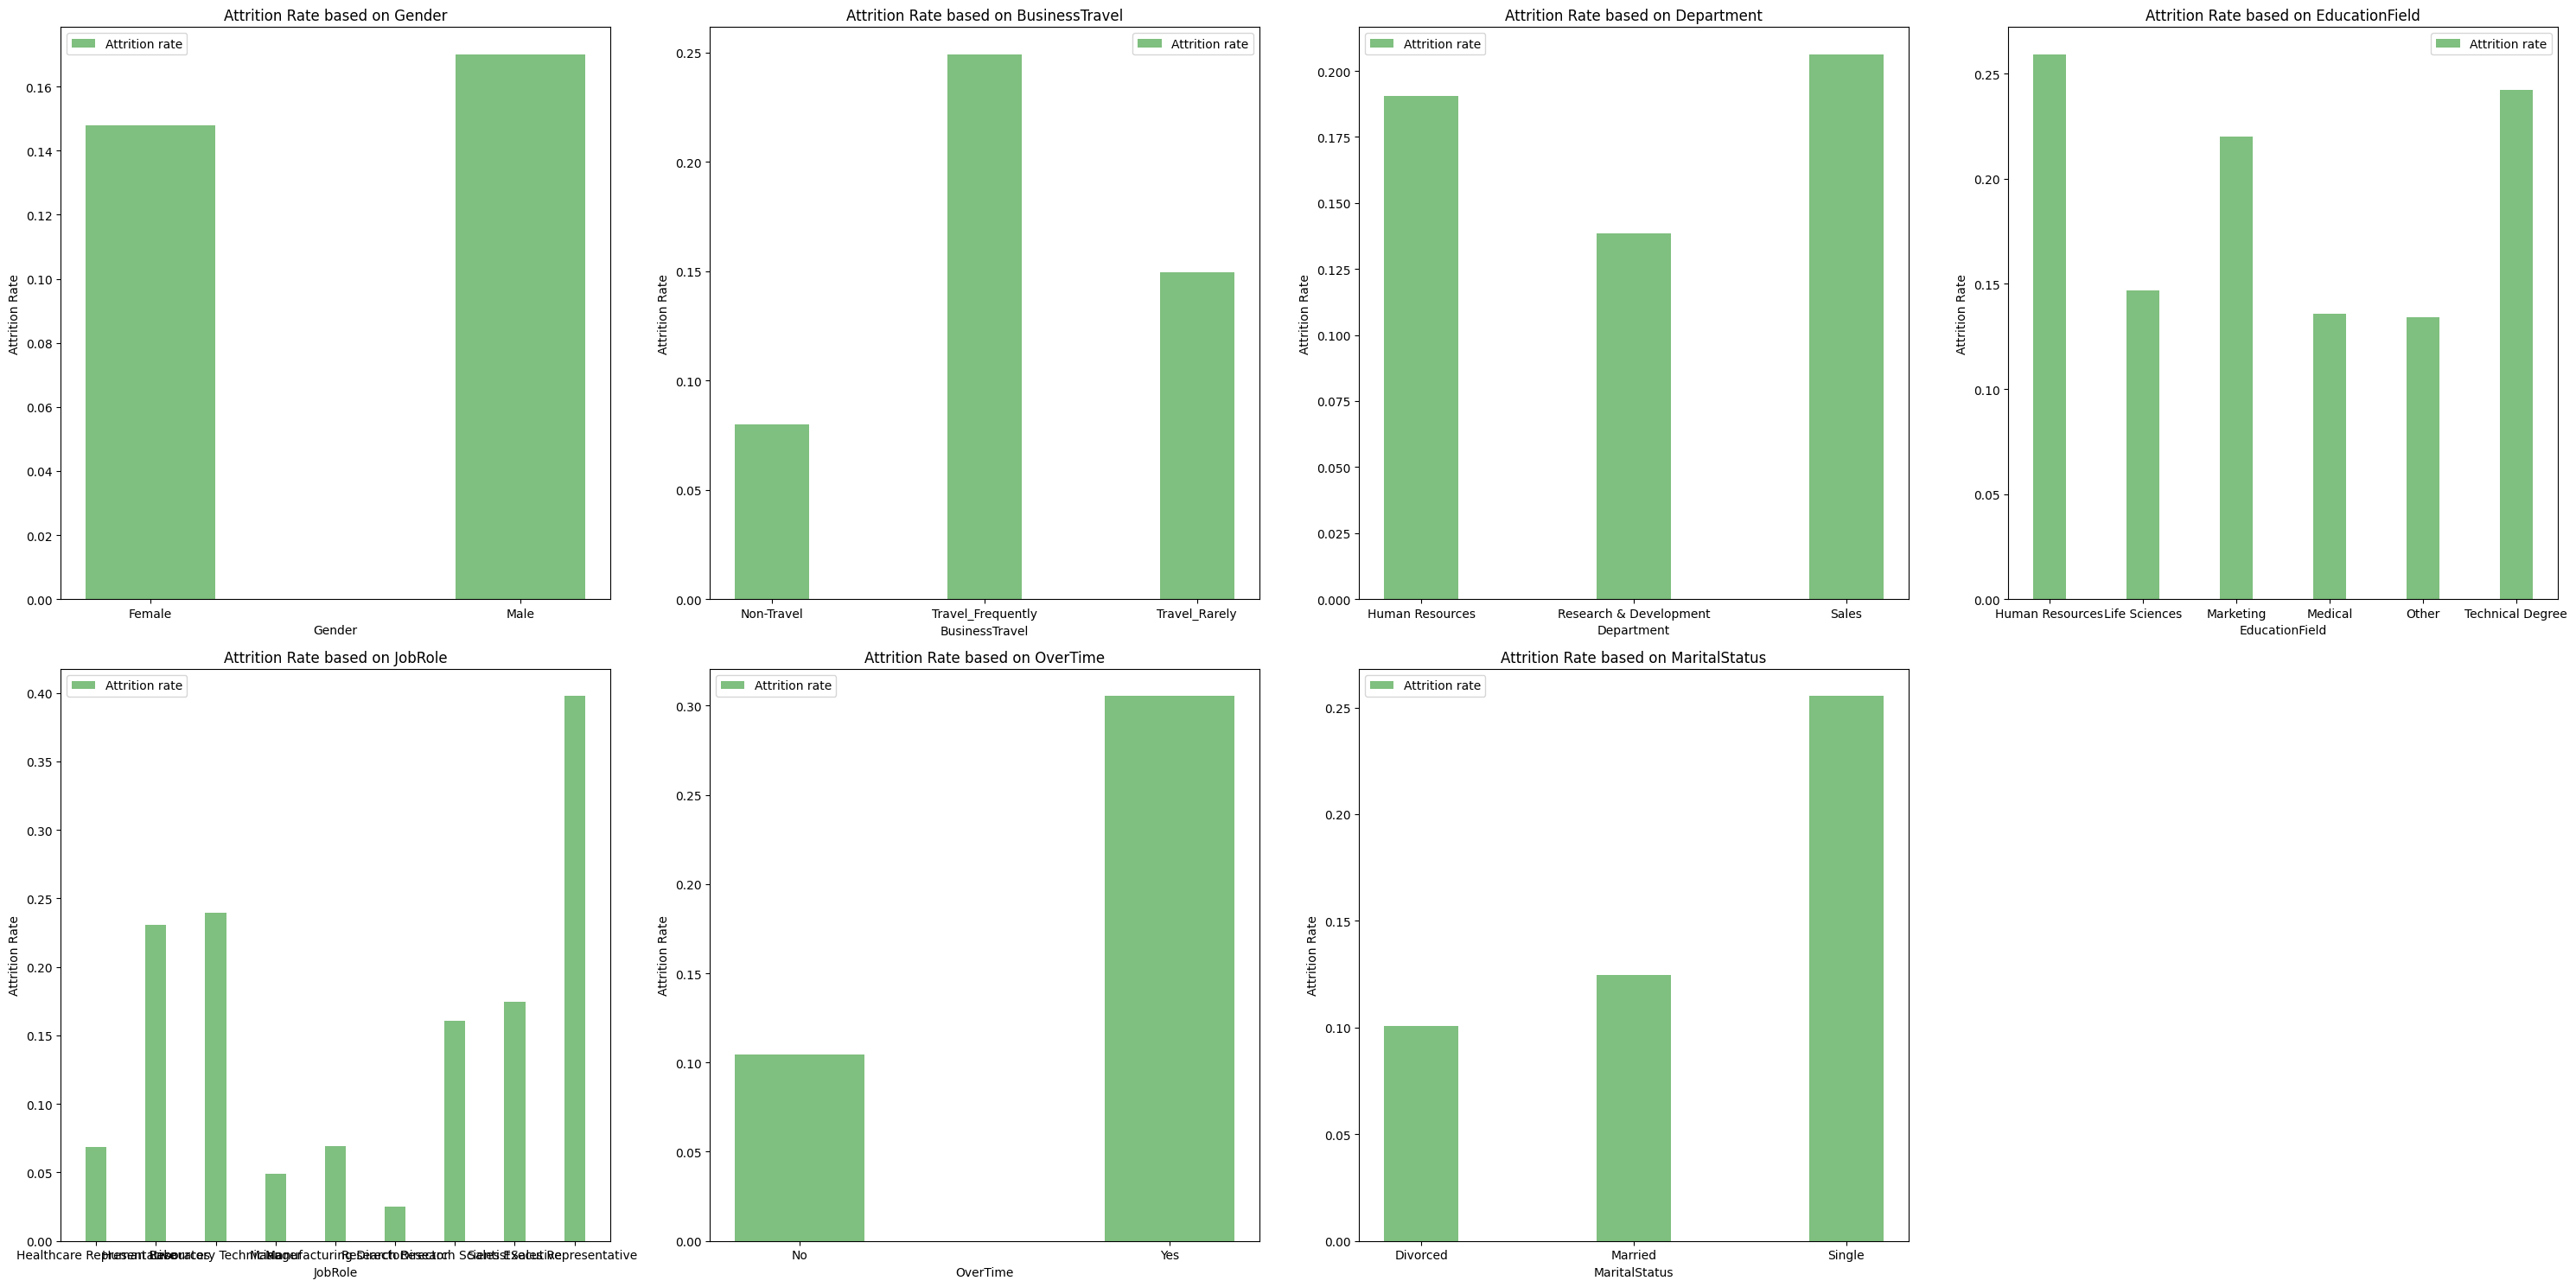

In [9]:
# find out categorical columns
num_cols = data._get_numeric_data().columns
cat_cols = list(set(data.columns) - set(num_cols))

# convert categorical data into numerical
lable = LabelEncoder()
data["Attrition"] = lable.fit_transform(data["Attrition"])

# draw histogram to see if these categorical data have relationship with Attrition
Attrition_yes = data[data["Attrition"] == 1]
Attrition_no = data[data["Attrition"] == 0]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
for i, column in enumerate(cat_cols):
    row, col = divmod(i, 4)
    value_yes = Attrition_yes[column].value_counts().sort_index()
    value_no = Attrition_no[column].value_counts().sort_index()
    value = data[column].value_counts().sort_index()
    rate_yes = value_yes / value
    ax = axes[row, col]
    ax.bar(value_yes.index, rate_yes, label='Attrition rate', width=0.35, alpha=0.5, color='green')
    ax.set_xlabel(column)
    ax.set_ylabel('Attrition Rate')
    ax.set_title(f'Attrition Rate based on {column}')
    ax.legend()

for i in range(len(cat_cols), 2 * 4):
    row, col = divmod(i, 4)
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

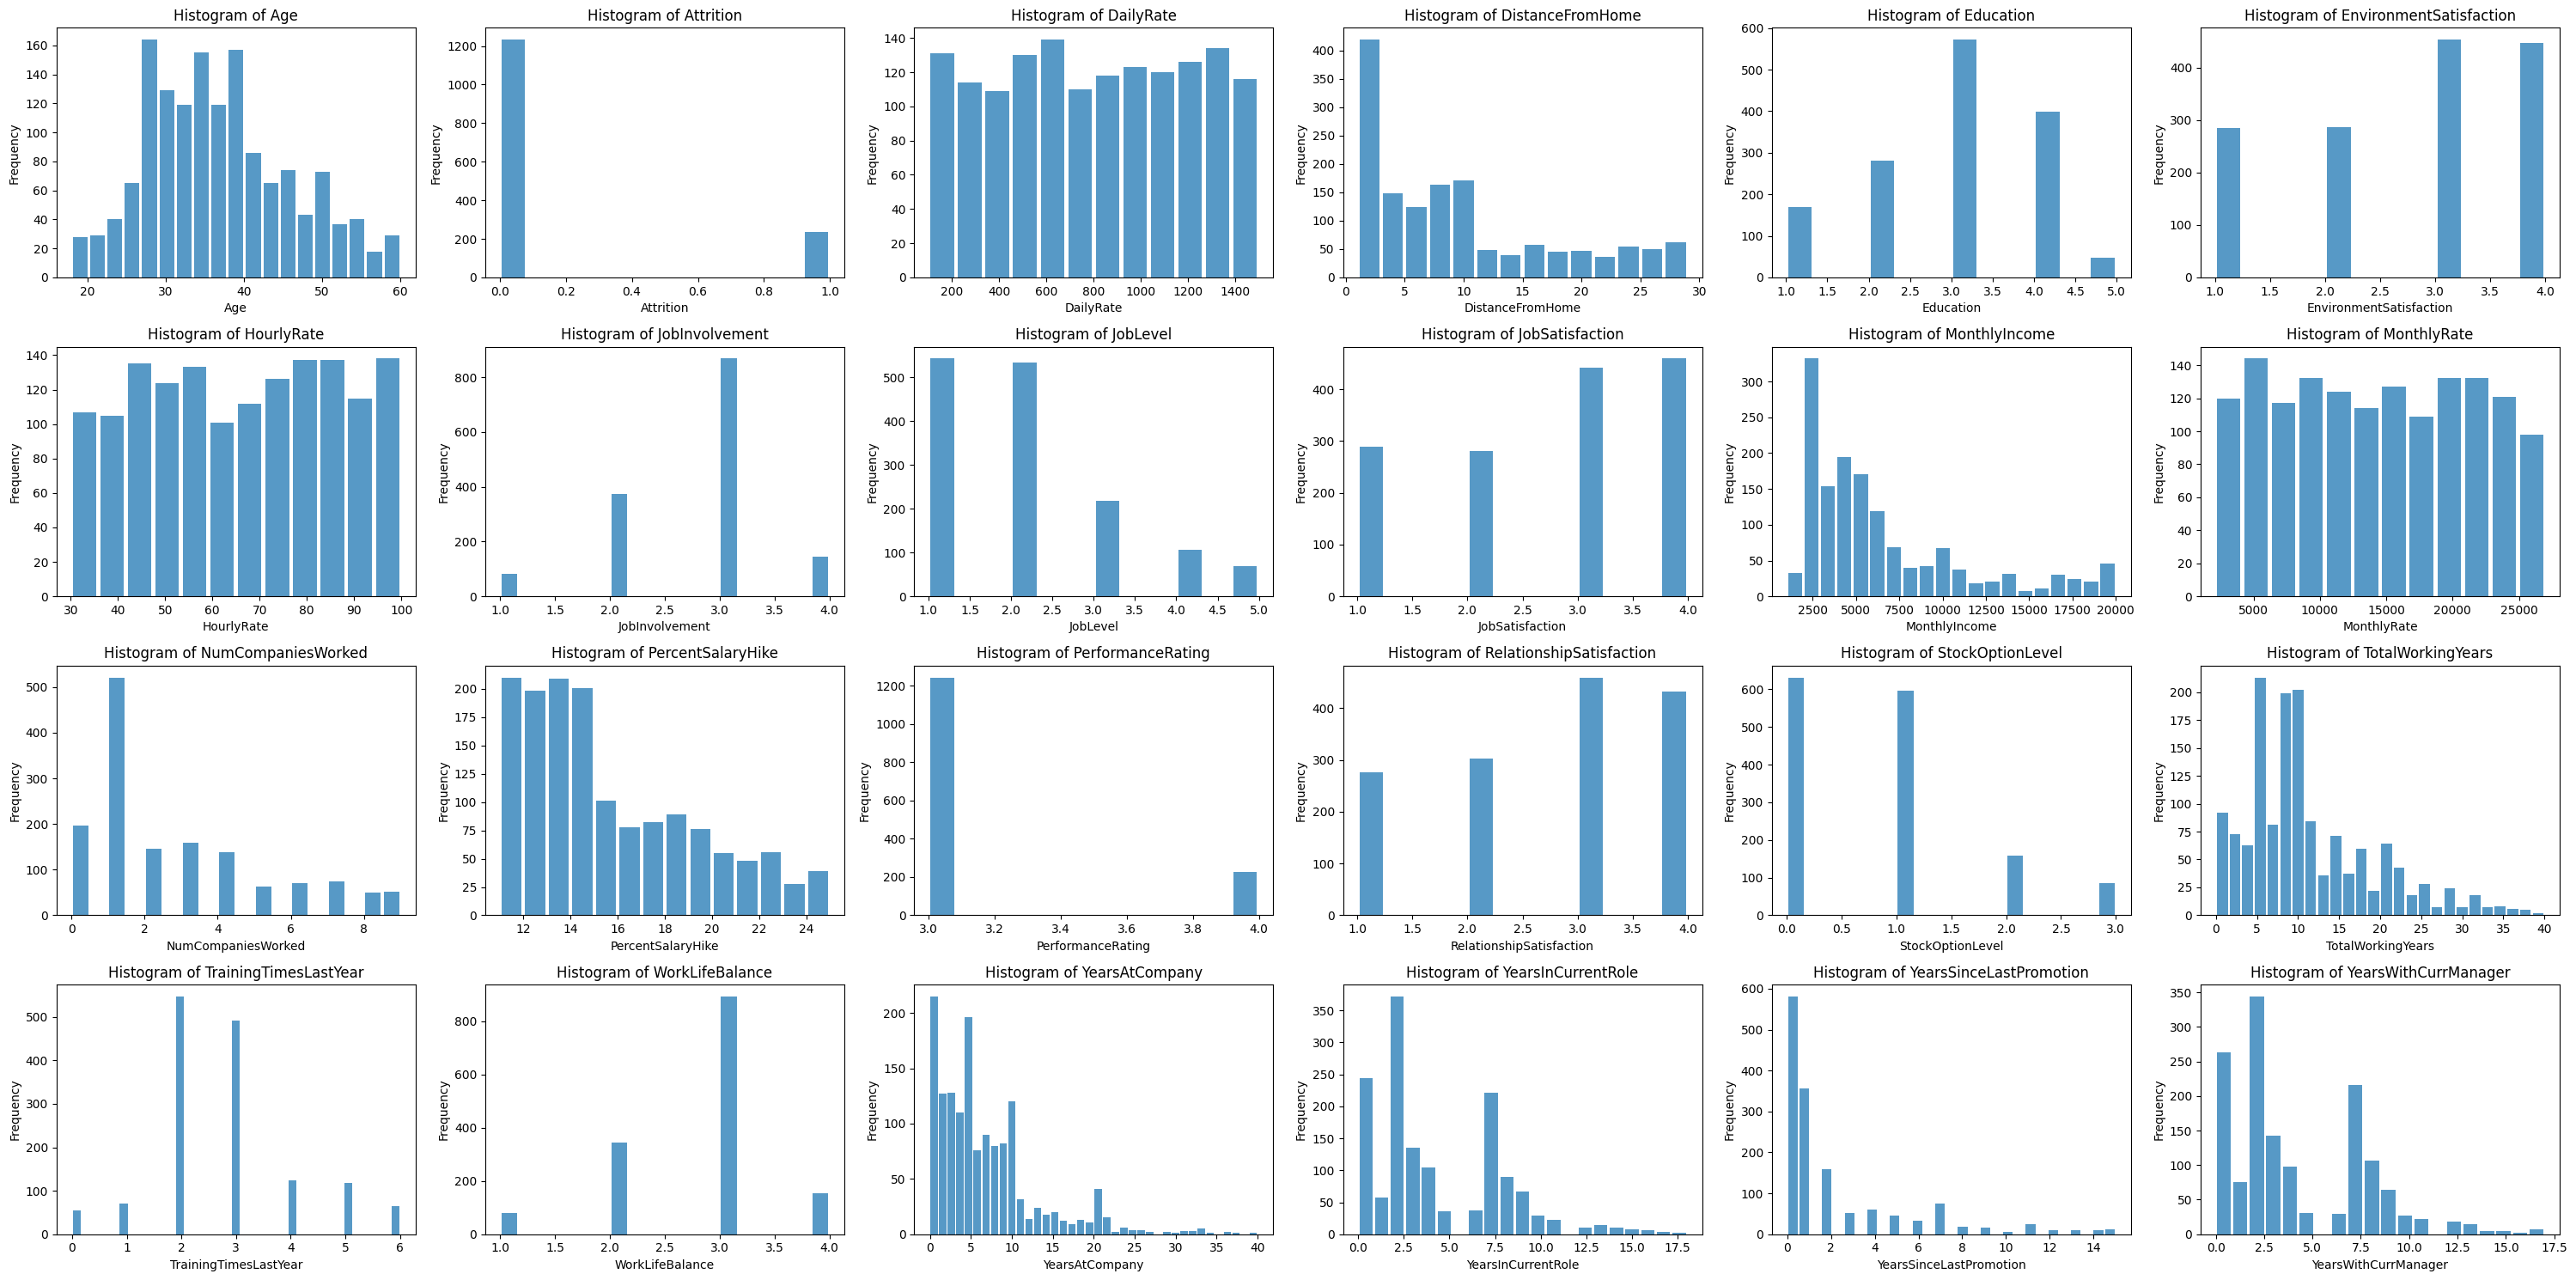

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(30, 15))
axes = axes.ravel()
for i, column in enumerate(num_cols):
    data_column = data[column]
    ax = axes[i]
    ax.hist(data_column,bins='auto',alpha=0.75,rwidth=0.85)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.set_title(f'Histogram of {column}')

for i in range(len(num_cols), 4 * 6):
    row, col = divmod(i, 6)
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

### Hypotheses Test

**the hypotheses for the relationship between JobLevel and Attrition**

The hypotheses for the relationship between JobLevel and Attrition:
Null Hypothesis (H0) Assumption:The attrition rates are equal across different job levels. H_0: mu_1 = mu_2 = mu_3 = ... = mu_n) mu_i represent the mean attrition rates for different job levels)
Alternative Hypothesis (H1): Assumption:The attrition rates vary across different job levels. H_1: At least two job levels have different mean attrition rates
If the test results reject the null hypothesis (H0), it indicates that there are significant differences in attrition rates among different job levels. If the test fails to reject the null hypothesis, it suggests that there is not enough evidence to support the idea that job levels significantly affect employee attrition rates.

In [11]:
#chi-squre


# Create a contingency table
contingency_table1 = pd.crosstab(data['Attrition'], data['JobLevel'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table1)

# Print results
print("Chi-square statistic:", chi2)
print("P-value:", p)

# Determine significance based on p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Attrition and JobLevel.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Attrition and JobLevel.")


contingency_table1

Chi-square statistic: 72.52901310667391
P-value: 6.634684715458909e-15
Reject the null hypothesis: There is a significant relationship between Attrition and JobLevel.


JobLevel     1    2    3    4   5
Attrition                        
0          400  482  186  101  64
1          143   52   32    5   5

**The hypotheses for the relationship between department and Attrition:**

In [12]:
# Create a contingency table
contingency_table2 = pd.crosstab(data['Attrition'], data['Department'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table2)

# Print results
print("Chi-square statistic:", chi2)
print("P-value:", p)

# Determine significance based on p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Attrition and Deparment.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Attrition and Department.")



contingency_table2

Chi-square statistic: 10.79600732241067
P-value: 0.004525606574479633
Reject the null hypothesis: There is a significant relationship between Attrition and Deparment.


Department  Human Resources  Research & Development  Sales
Attrition                                                 
0                        51                     828    354
1                        12                     133     92

Divide data into different department

In [13]:
# check the count for each department
data["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [14]:
data_department = data.groupby("Department")
department_data = {}
for department, department_df in data_department:
    department_data[department] = pd.DataFrame(department_df)


In [15]:
department_data["Sales"]["Attrition"].value_counts()

0    354
1     92
Name: Attrition, dtype: int64

### Outlier detection

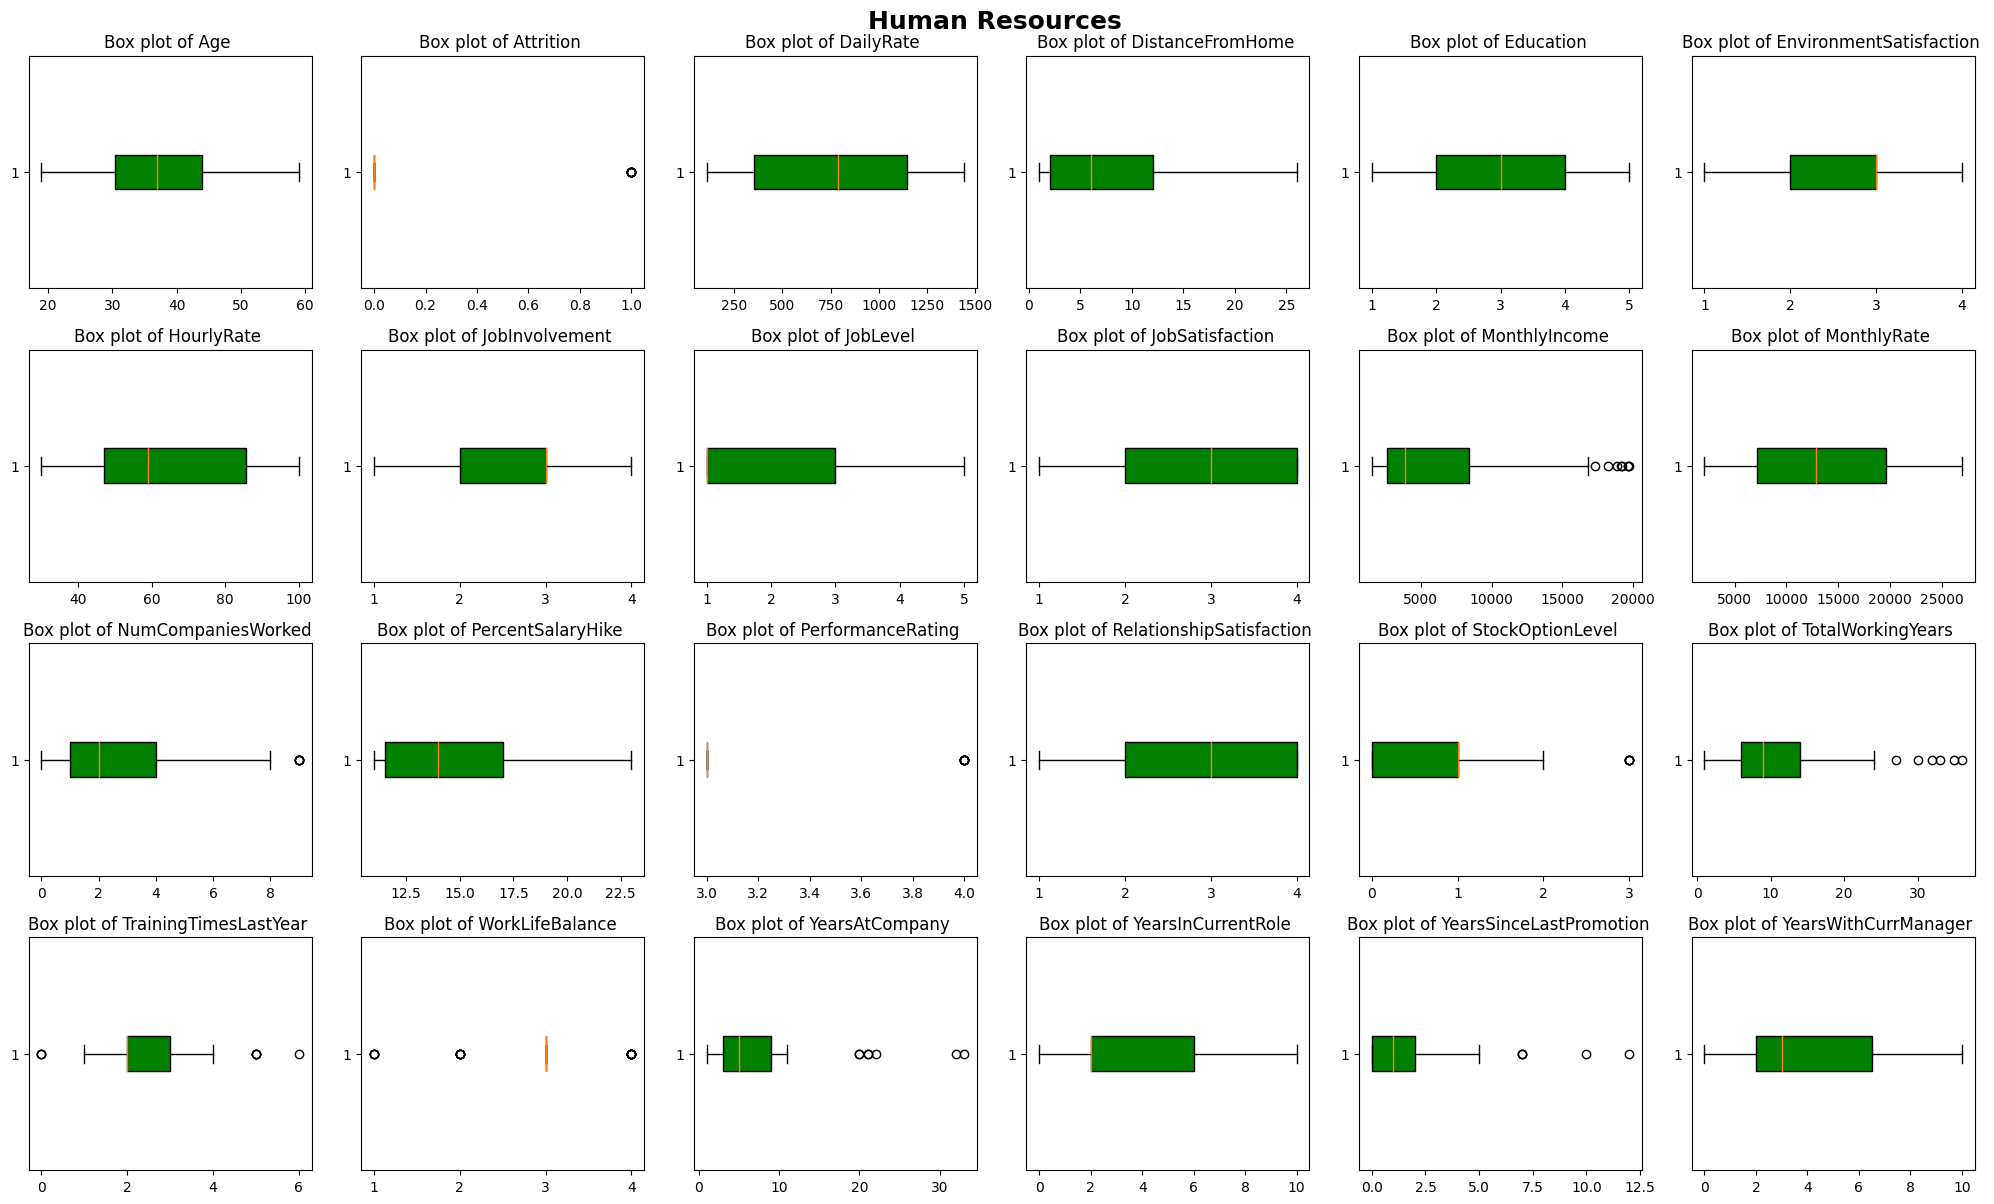

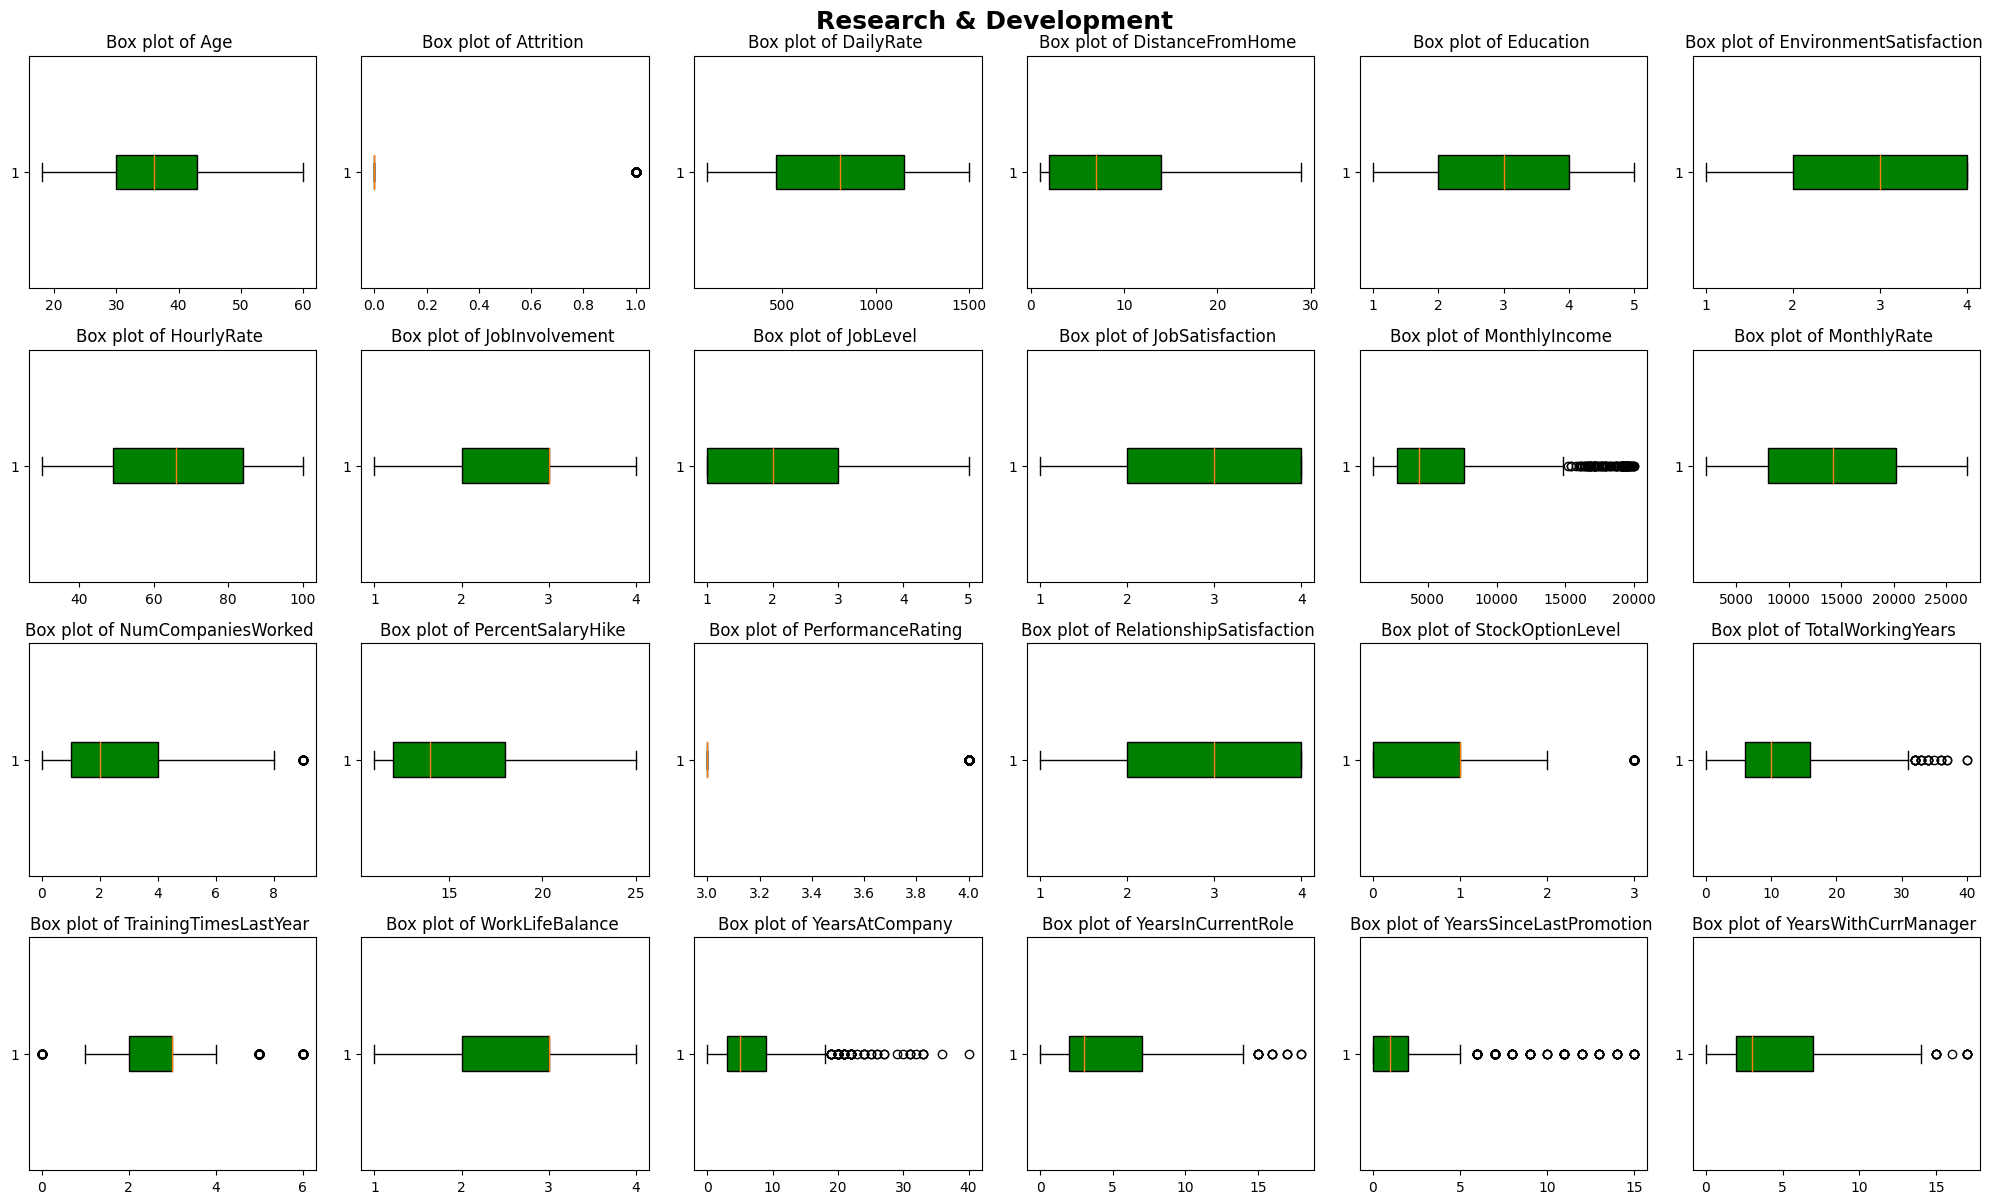

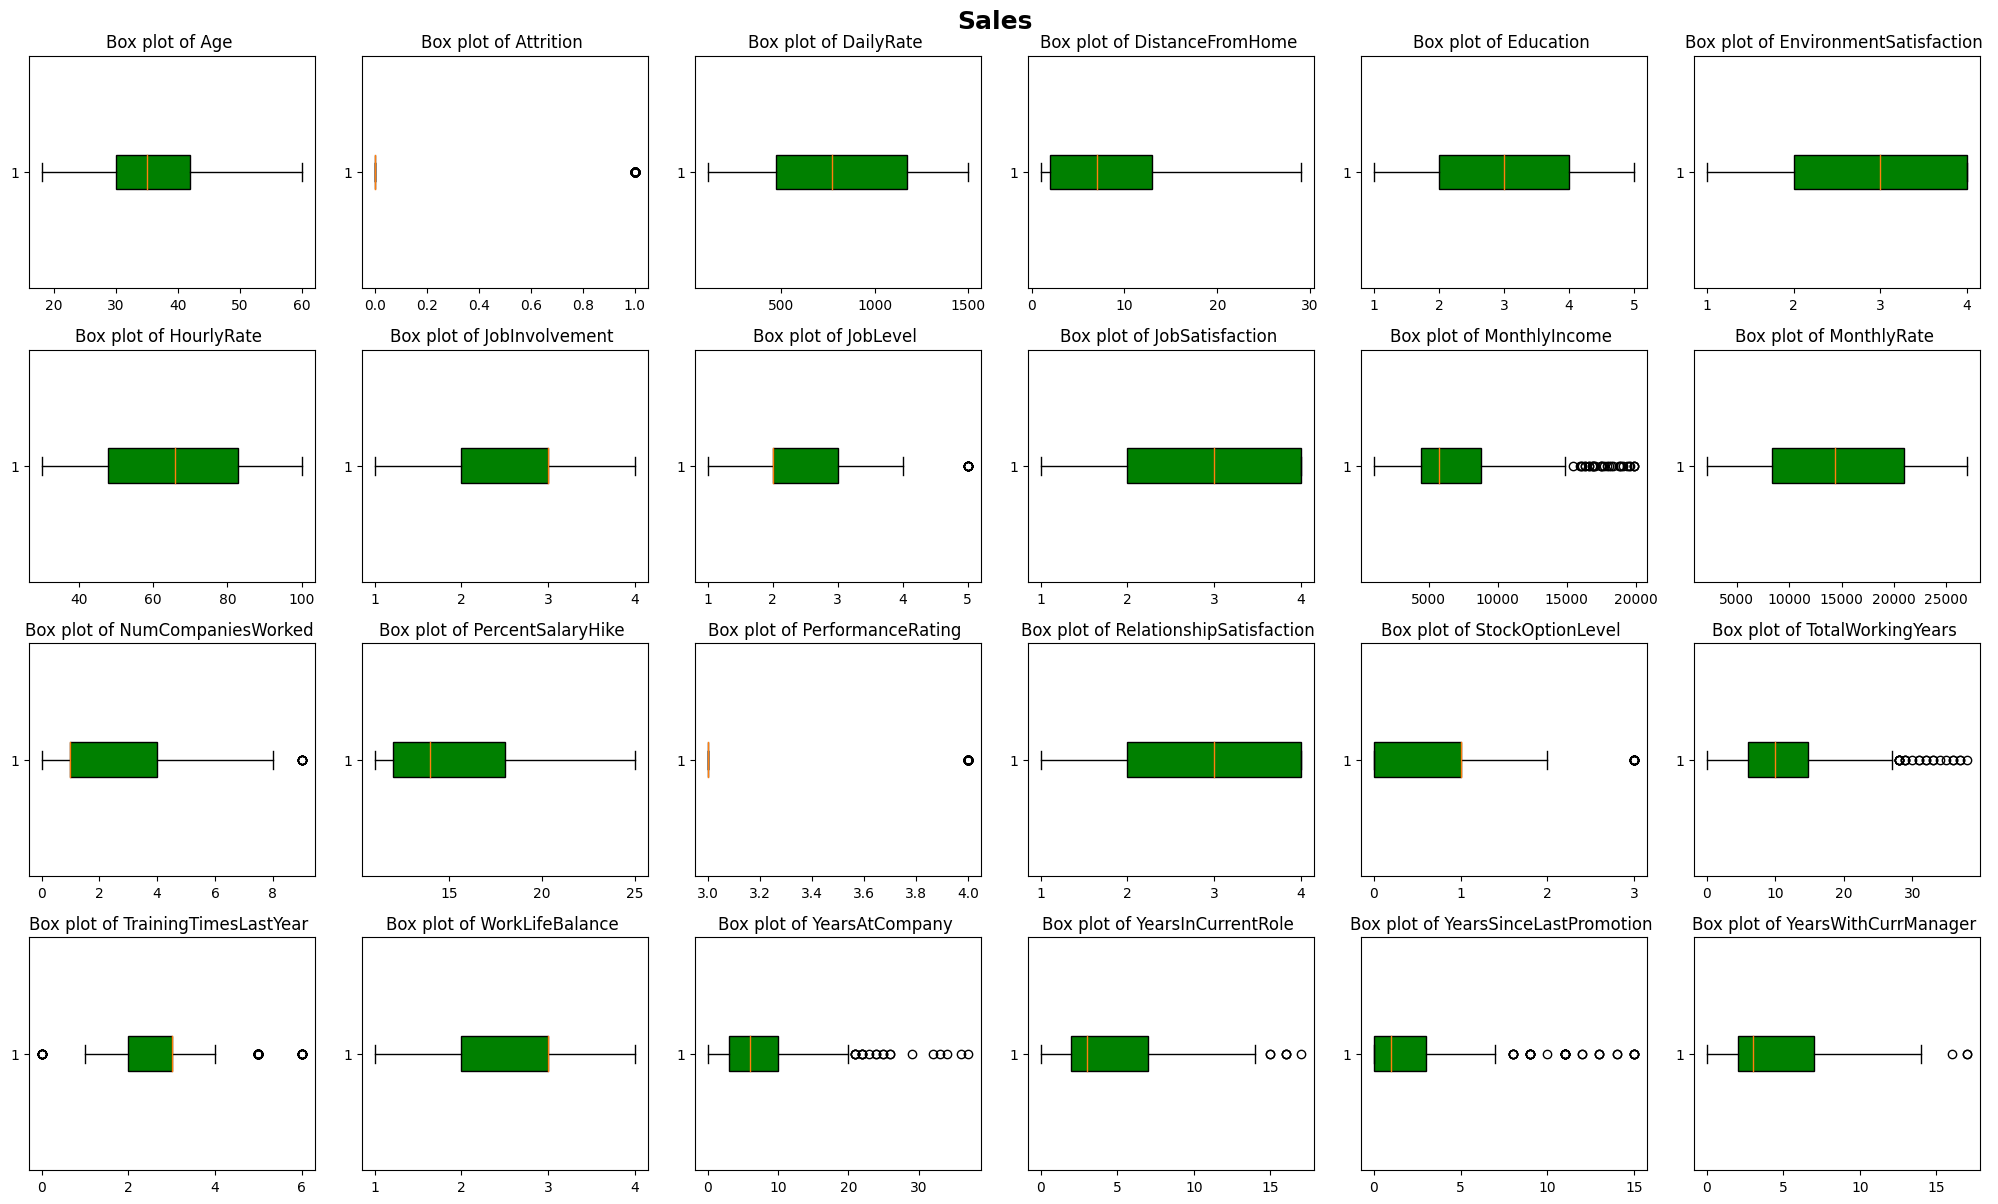

In [16]:
# Detect Outlier by drawing boxplot for each department
for department in department_data:
  data_d = department_data[department]
  int64_columns = [column for column in data_d.columns if data_d[column].dtype == 'int64']
  fig, axes = plt.subplots(5, 6, figsize=(20, 15))
  fig.suptitle(f'{department}', fontsize=18, fontweight='bold')
  for i,column in enumerate(int64_columns):
      row, col = divmod(i, 6)
      ax = axes[row, col]
      ax.boxplot(data_d[column],vert=False, patch_artist=True,boxprops=dict(facecolor='green'))
      ax.set_title(f"Box plot of {column} ")

  # delete empty plots
  for i in range(len(int64_columns), 5 * 6):
      row, col = divmod(i, 6)
      fig.delaxes(axes[row, col])

  plt.tight_layout()
plt.show()

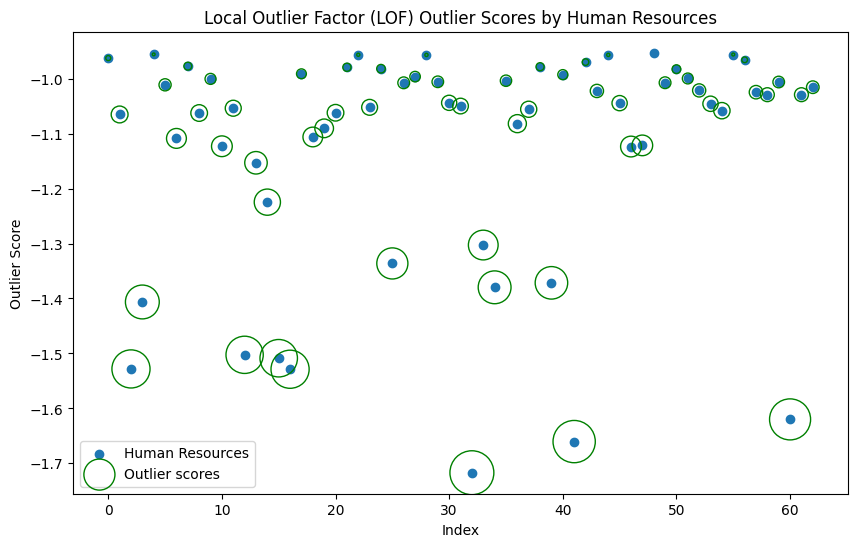

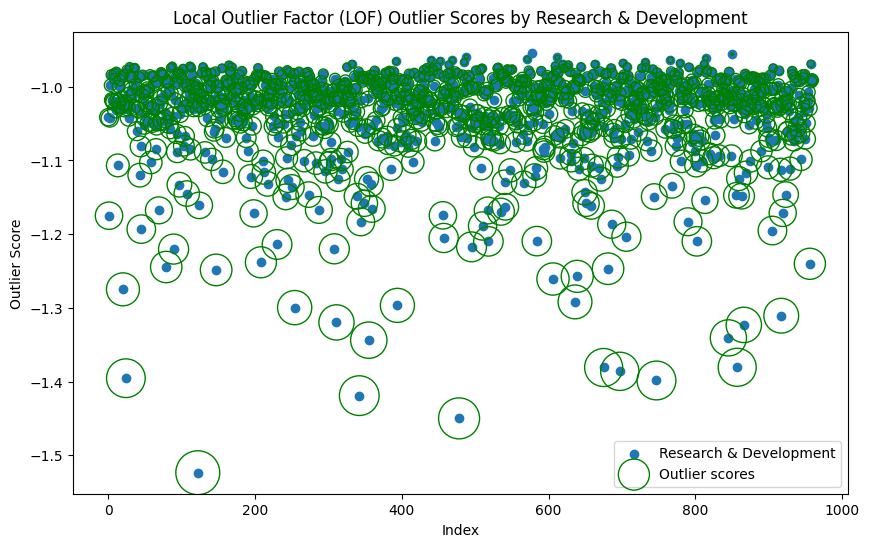

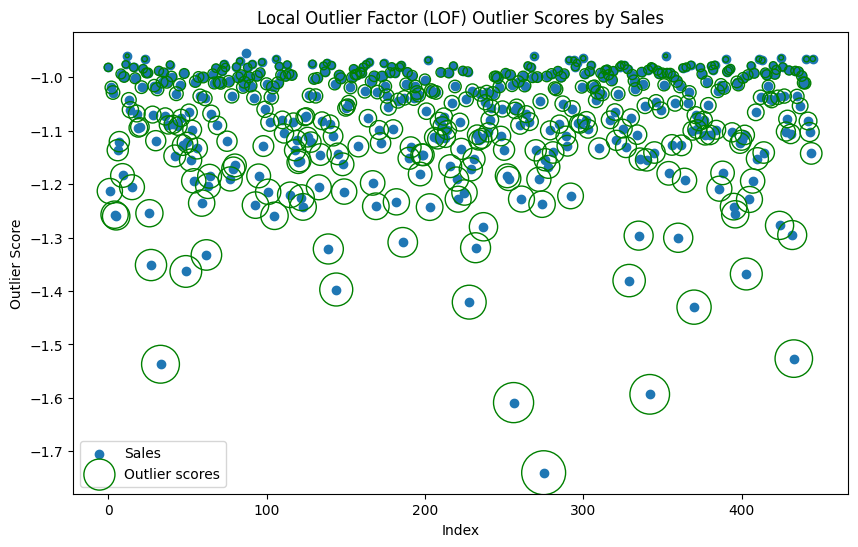

In [17]:
# Futhur Outlier detection by LOF
def update_legend_marker_size(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([20])

scores={}
for department in department_data:
  data_d = department_data[department]
  int64_columns = [column for column in data_d.columns if data_d[column].dtype == 'int64']
  X = data_d[int64_columns]
  lof = LocalOutlierFactor(n_neighbors=20,contamination=0.1)
  outliers = lof.fit_predict(X)
  scores[department] = lof.negative_outlier_factor_
  X_scores = scores[department]

#plot the detection result
  plt.figure(figsize=(10, 6))
  plt.scatter(range(len(X_scores)), X_scores, label=department)
  radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
  scatter = plt.scatter(
  range(len(X_scores)),
  X_scores,
  s=1000 * radius,
  edgecolors="green",
  facecolors="none",
  label="Outlier scores",
)
  plt.legend(handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)})
  plt.xlabel("Index")
  plt.ylabel("Outlier Score")
  plt.title(f"Local Outlier Factor (LOF) Outlier Scores by {department}")
  plt.legend()
  plt.show()


In [18]:
# remove outlier
i=0
clean_data ={}
# remove outlier from Human Resources dataset
data_1 = department_data['Human Resources']
threshold_1 = -1.3
not_outlier = scores['Human Resources'] > threshold_1
clean_data['Human Resources'] = data_1[not_outlier].reset_index()
# remove outlier from Research & Development dataset
data_2 = department_data['Research & Development']
threshold_2 = -1.3
not_outlier = scores['Research & Development'] > threshold_2
clean_data['Research & Development'] = data_2[not_outlier].reset_index()
# remove outlier from sales dataset
data_3 = department_data['Sales']
threshold_2 = -1.4
not_outlier = scores['Sales'] > threshold_2
clean_data['Sales'] = data_3[not_outlier].reset_index()


In [19]:
X = pd.get_dummies(clean_data["Sales"].drop(columns = ["Attrition"]))
y = clean_data["Sales"]["Attrition"]

# Divide the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression models
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train, y_train)


y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"confusion matrix of logistic regression models: {cnf_matrix}")
print(f"Accuracy of logistic regression models: {accuracy:.2f}")
# print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f'Matthews Correlation Coefficient:{matthews_corrcoef(y_test, y_pred)}')

confusion matrix of logistic regression models: [[70  2]
 [ 9  7]]
Accuracy of logistic regression models: 0.88
Matthews Correlation Coefficient:0.5215319974040897


<ipython-input-20-6153eb9144db>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_d.corr(), annot=True, cmap="crest", annot_kws={"size":15})


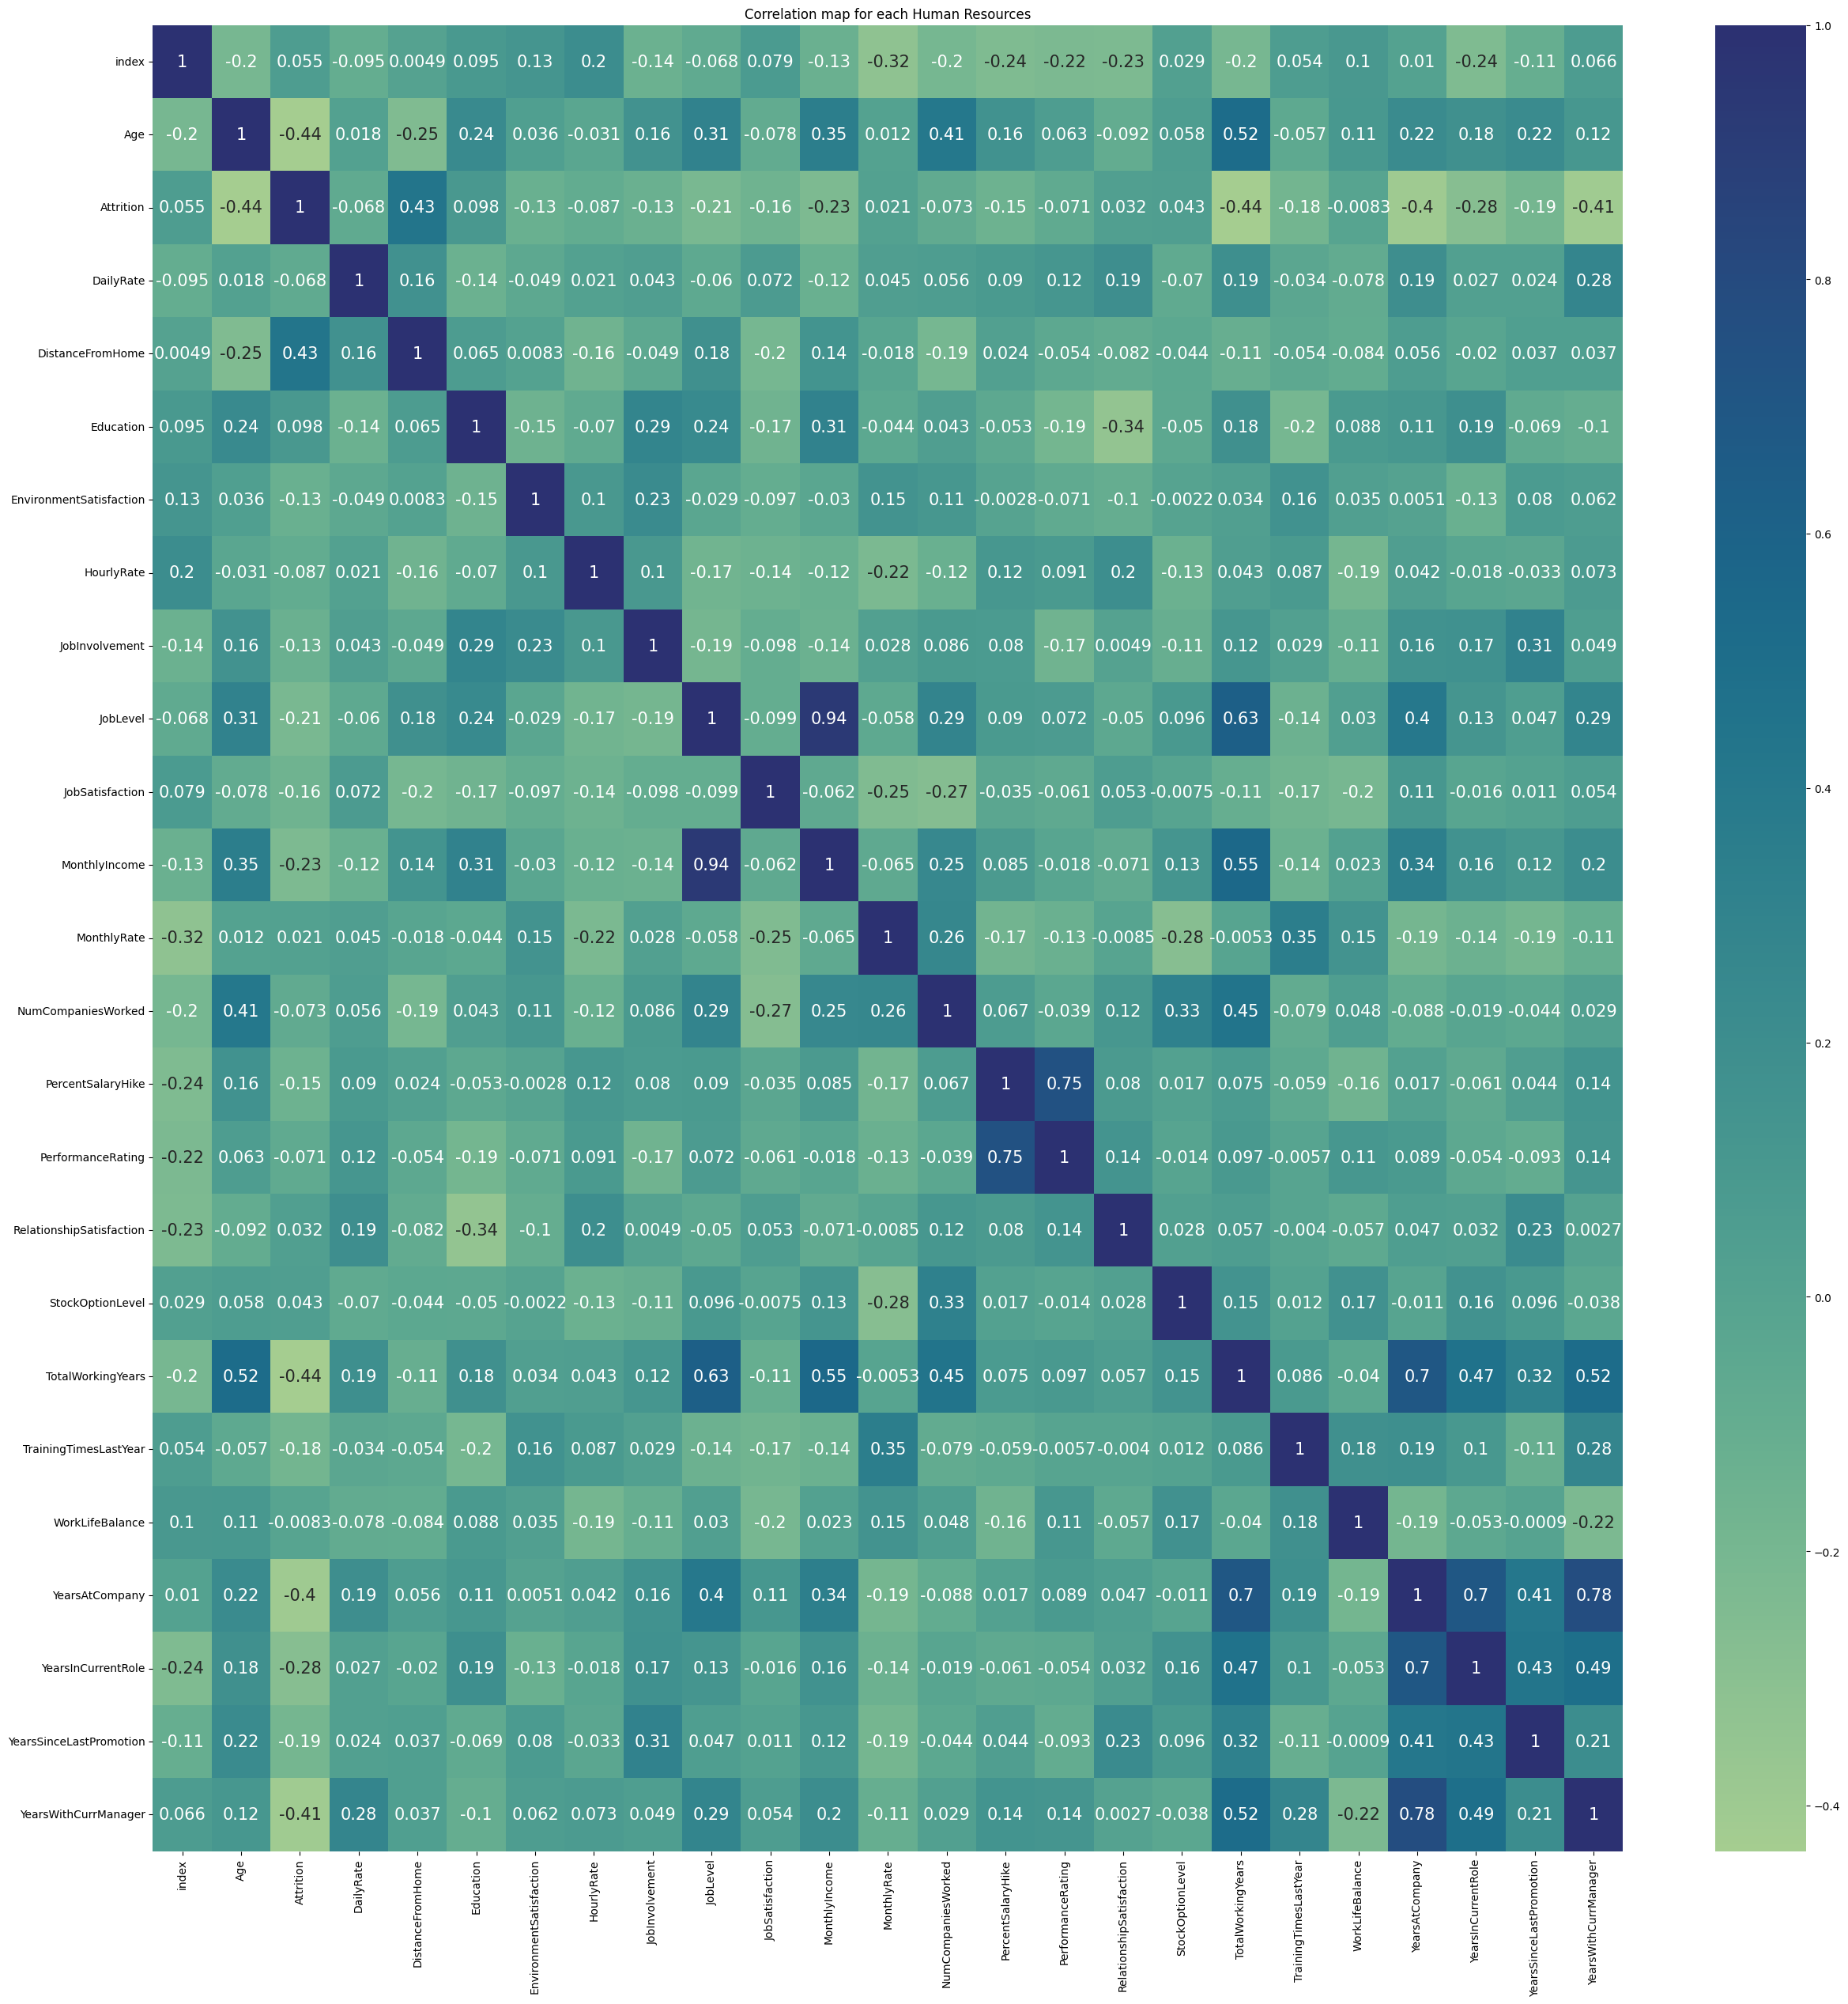

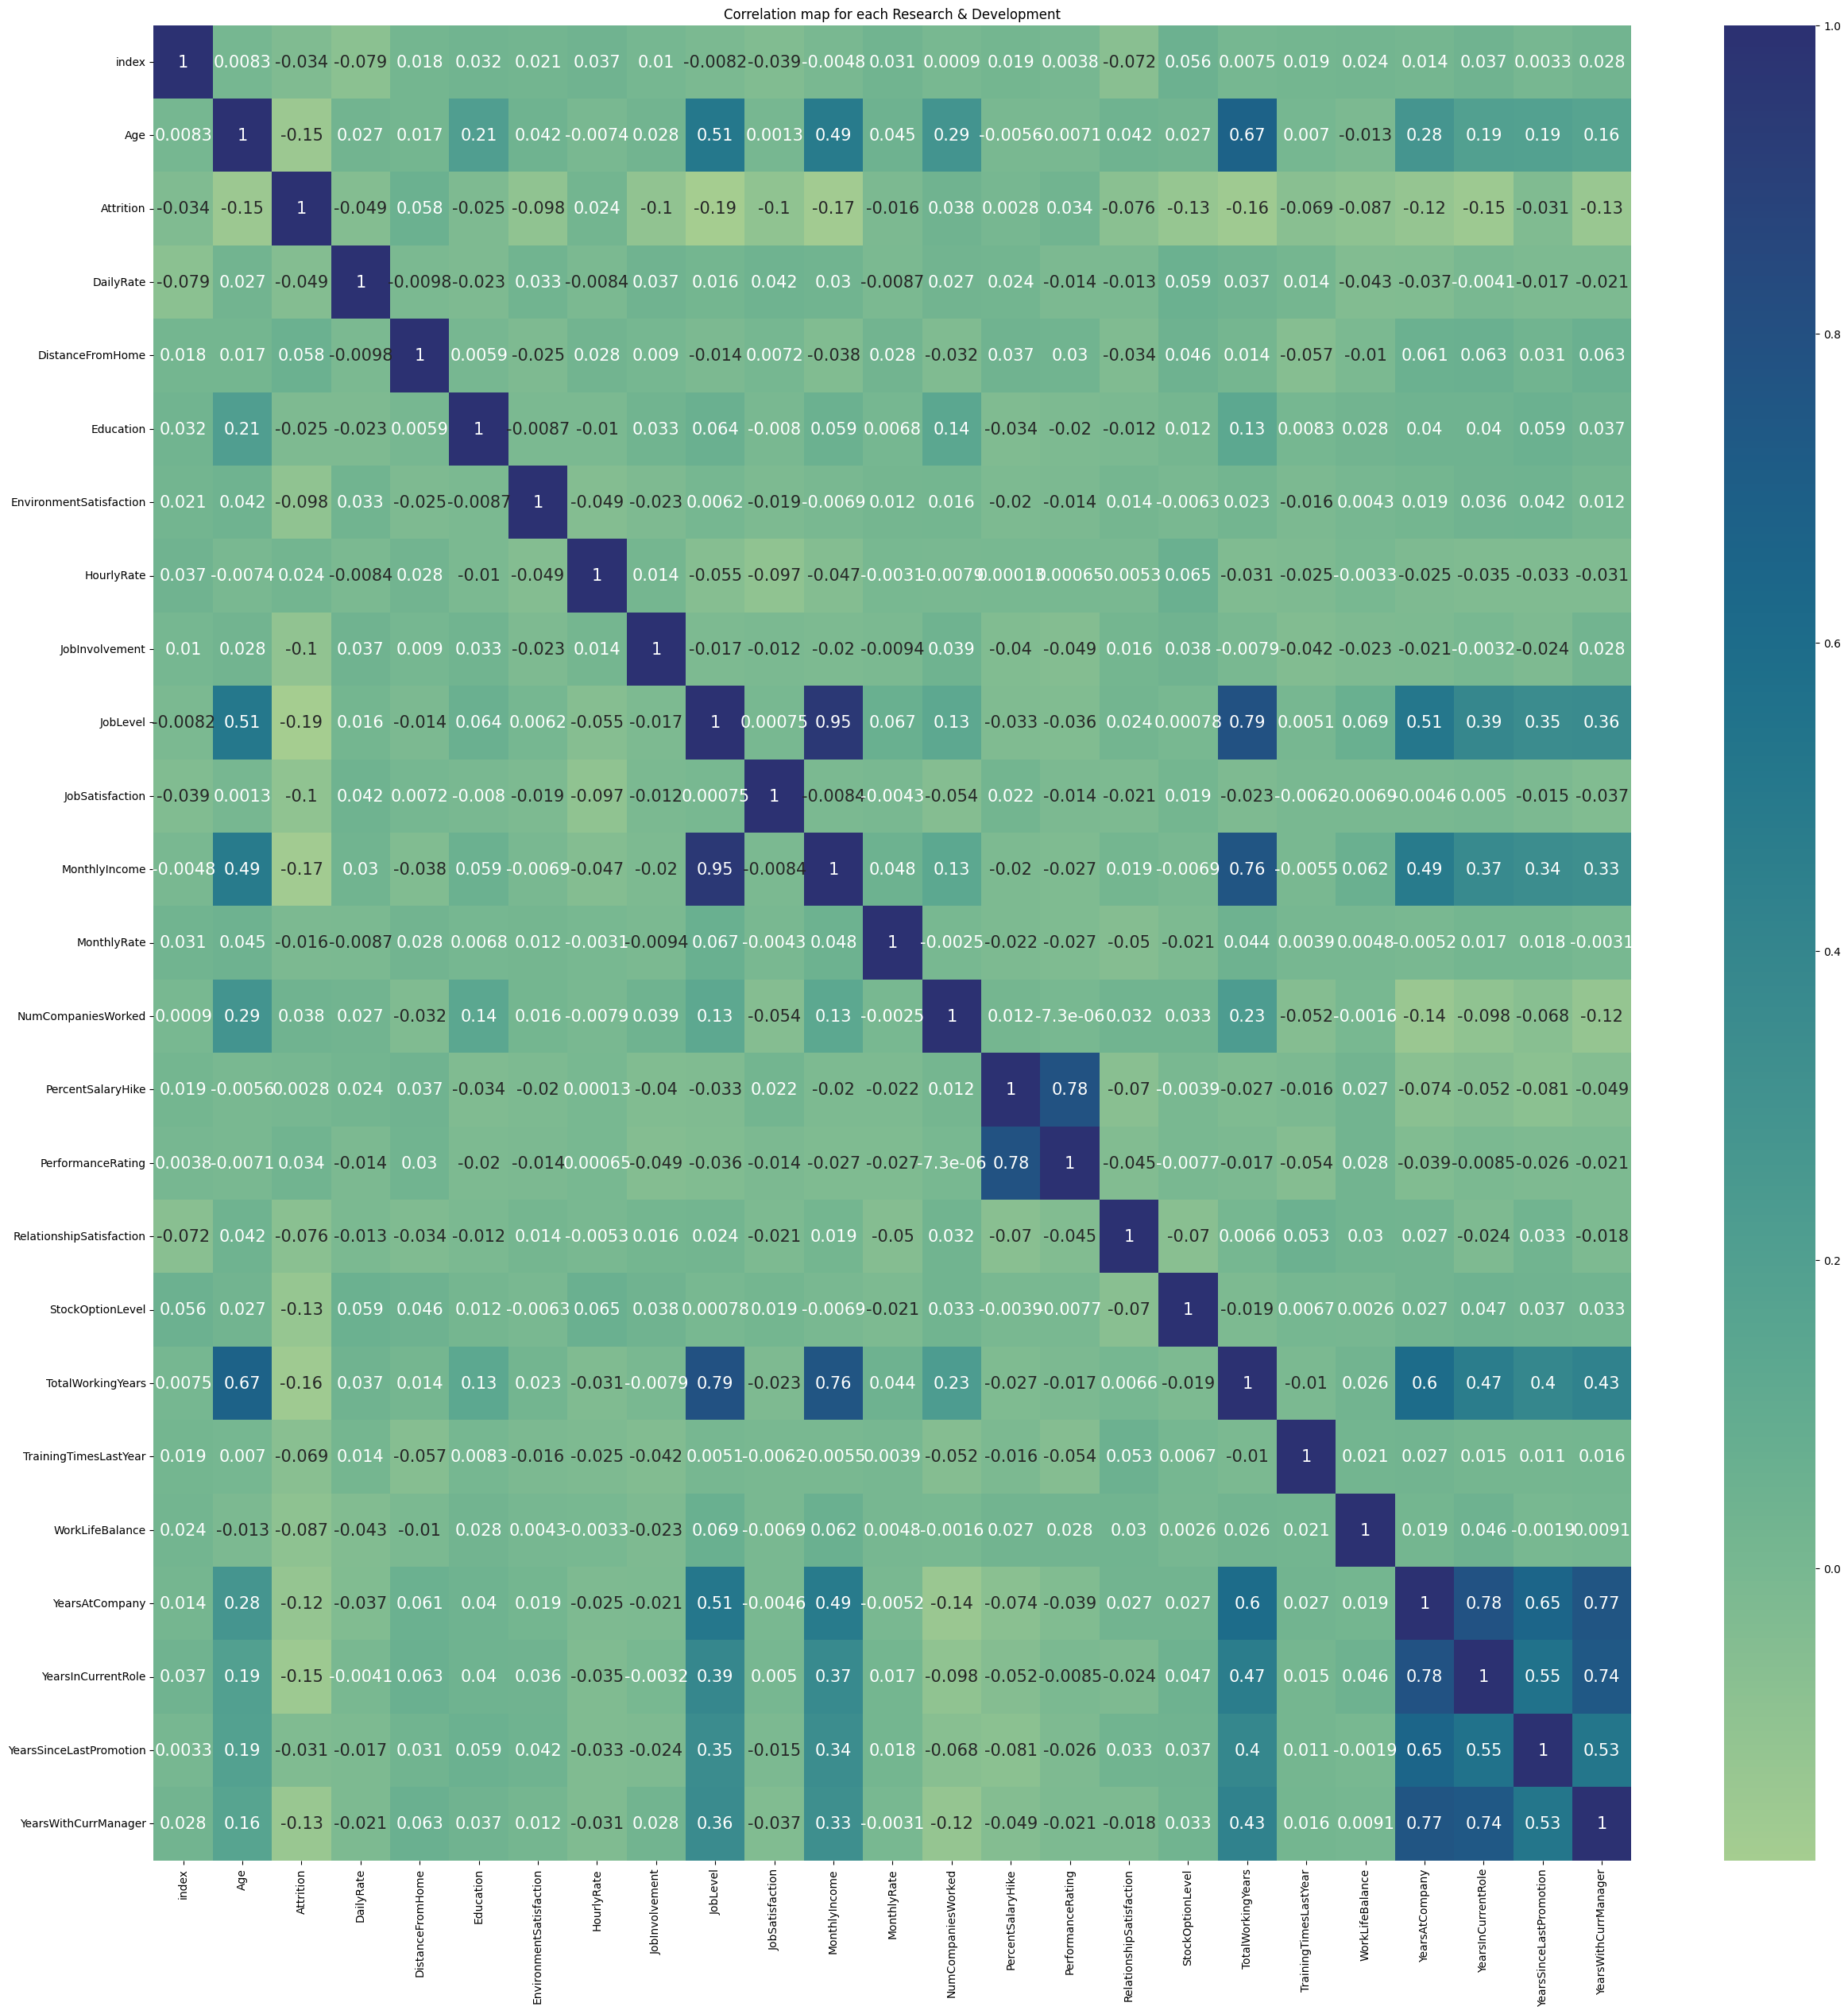

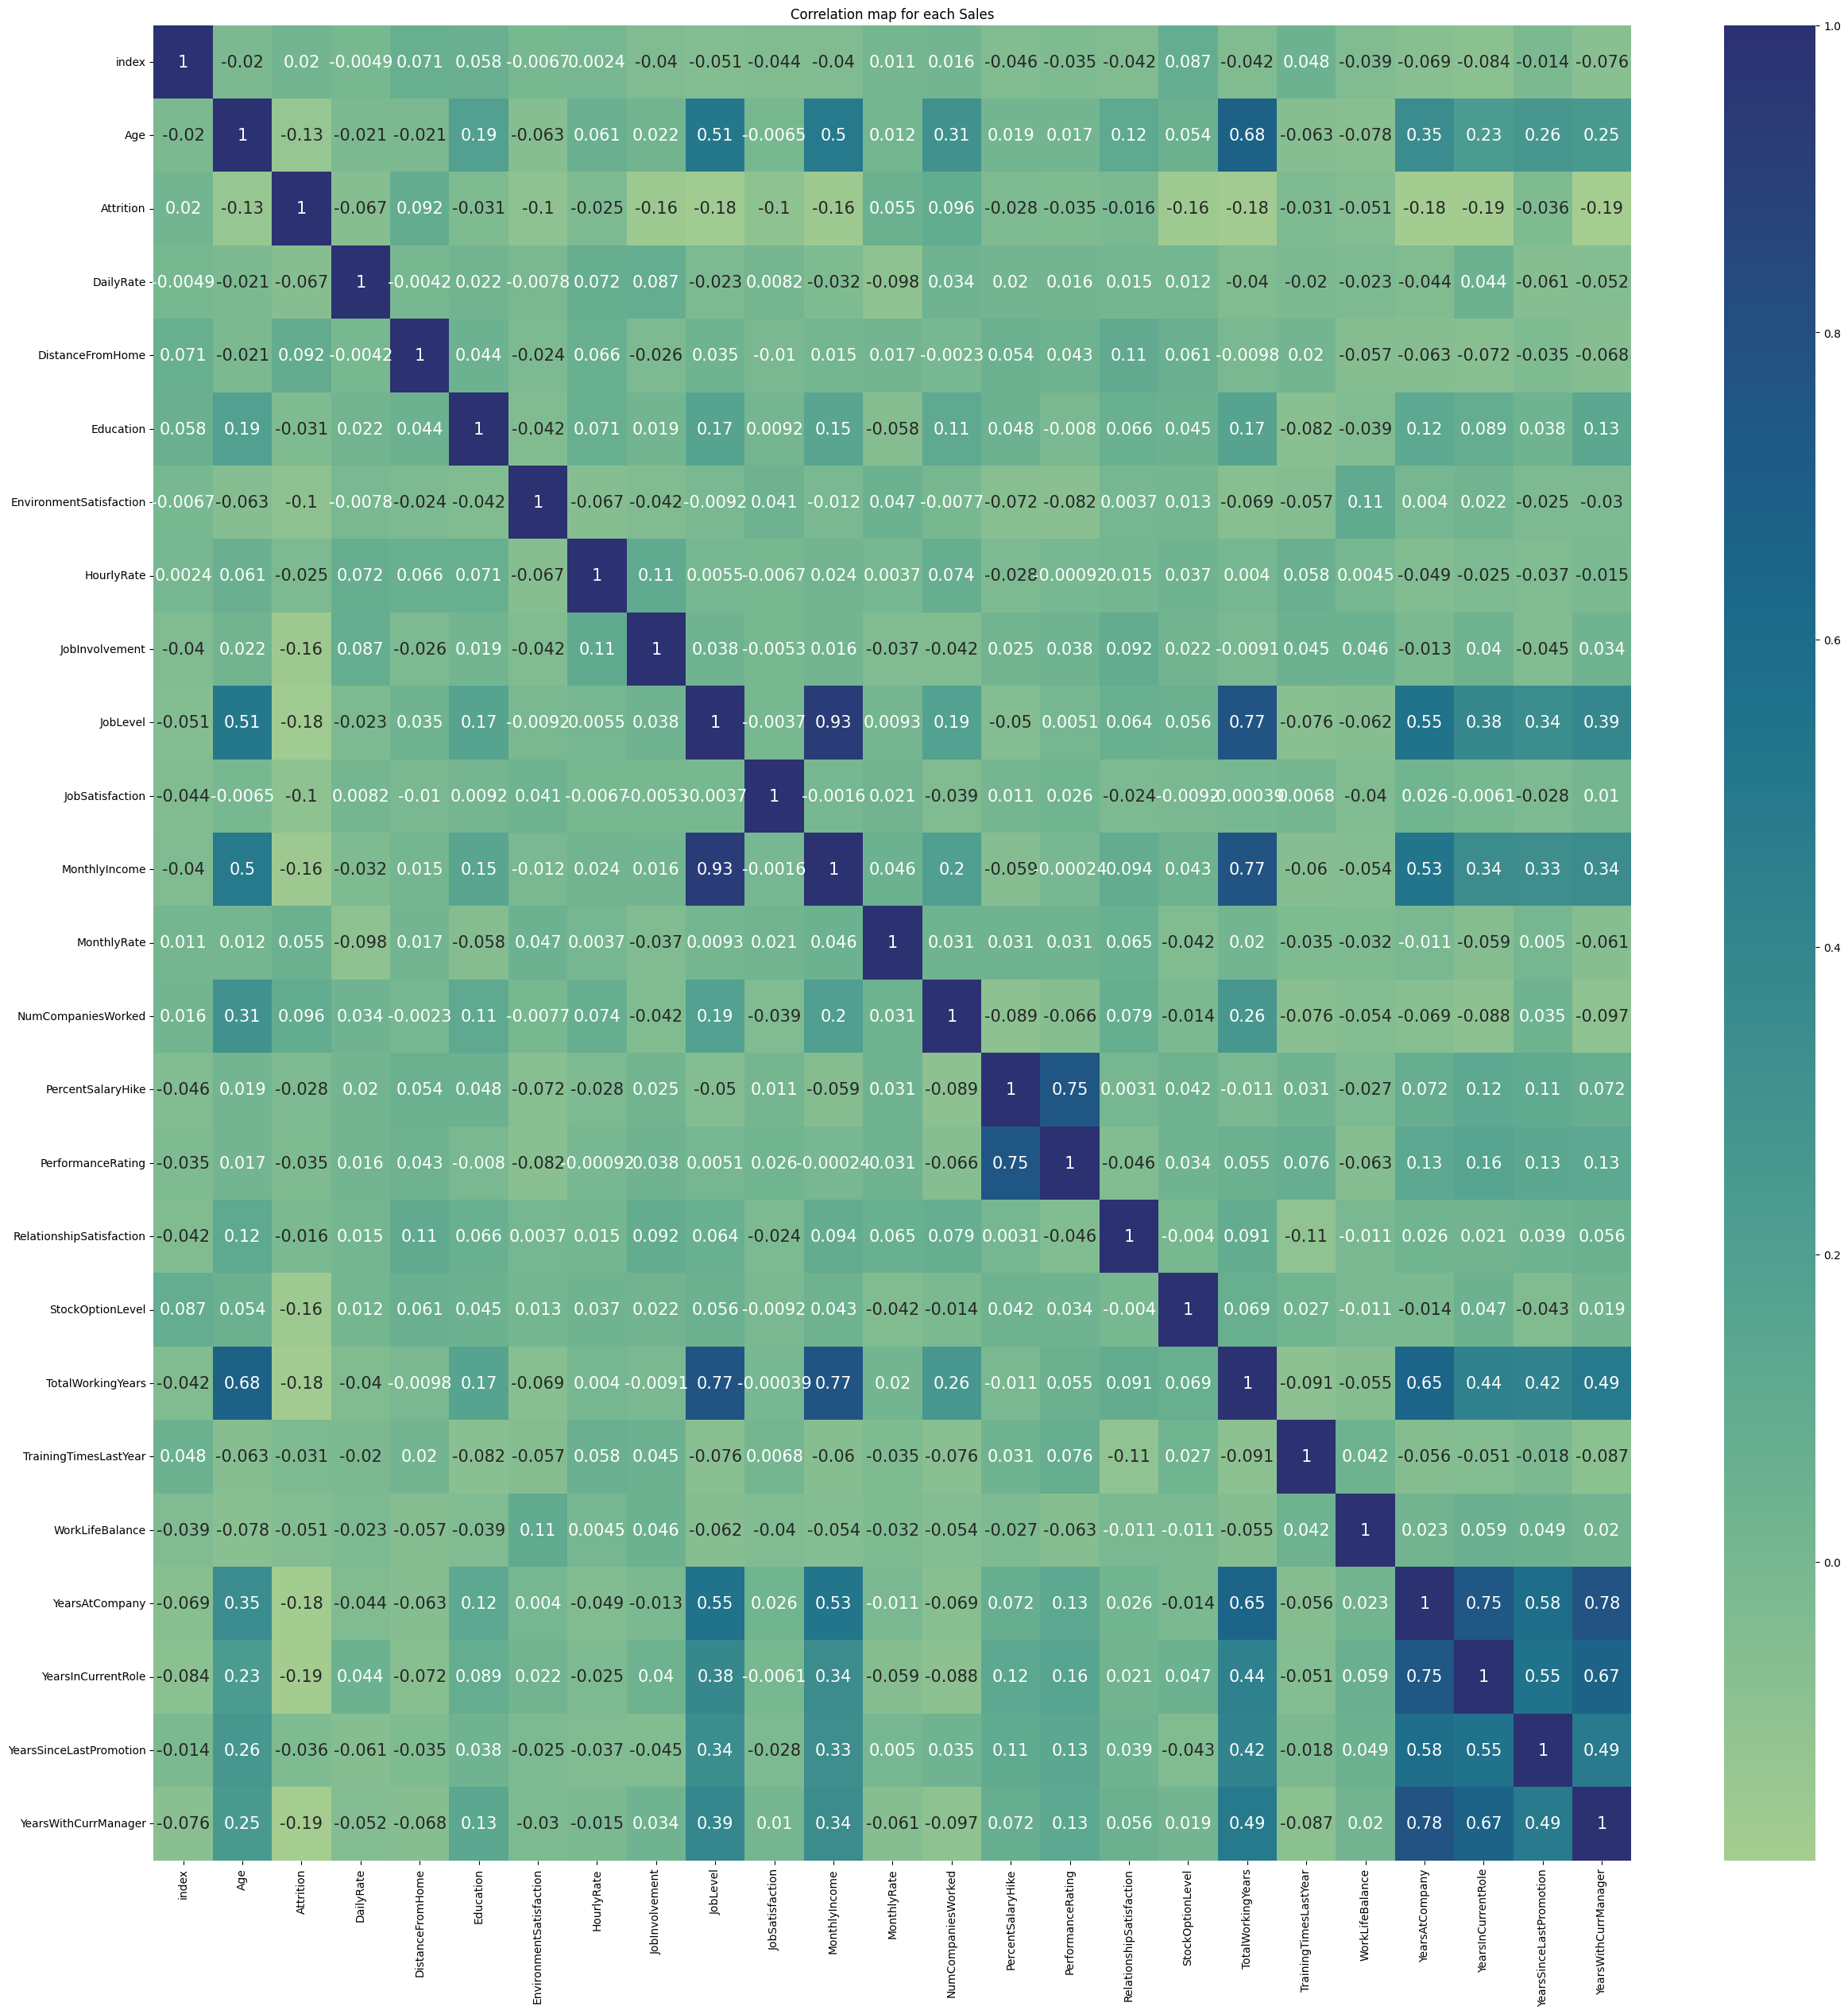

In [20]:
# Covariance between heatmap and numerical data
for department in department_data:
  data_d = clean_data[department]
  plt.figure(figsize=(30, 30))
  plt.title(f"Correlation map for each {department}")
  sns.heatmap(data_d.corr(), annot=True, cmap="crest", annot_kws={"size":15})

In [21]:
X = pd.get_dummies(data.drop(columns=["Attrition"]))
y = data["Attrition"]

# Divide the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression models
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train, y_train)


y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"confusion matrix of logistic regression models: {cnf_matrix}")
print(f"Accuracy of logistic regression models: {accuracy:.2f}")
# print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f'Matthews Correlation Coefficient:{matthews_corrcoef(y_test, y_pred)}')

confusion matrix of logistic regression models: [[243  12]
 [ 24  15]]
Accuracy of logistic regression models: 0.88
Matthews Correlation Coefficient:0.3964710078067446


### Fix Imbalance Data

1. SMOTE-Tomek Links Method
SMOTE-Tomek Links Method combines the capabilities of SMOTE and Tomek Links methods, with SMOTE for oversampling and Tomek Links for data cleaning.
SMOTE allows for synthesizing new samples from existing samples, oversampling the data on minority groups (Rankdeck, 2022).
SMOTE-steps:
1. Select random data in the minority category.
2. Calculate the Euclidean distance of the random data from its neighbors.
3. Multiply the difference between the distance of the random data and its neighbors by a random number between 0 and 1.
4. add the result to the minority category as a synthetic sample.
5. Repeat this process, granting the percentage of minorities until the data set is balanced.
Tomek link is a low-sampling technique. It finds the closest data to the minority category data in the majority category by calculating the Euclidean distance and then removes it (Rankdeck, 2022).


## **Model**

In [22]:
def balance_data(X_train,y_train):
  smote = SMOTE(sampling_strategy='auto', random_state=42)
  X_resampled, y_resampled = smote.fit_resample(X_train,y_train)
  return X_resampled, y_resampled

In [23]:
# Define a list of models to iterate through
models = [
    ('Logistic Regression', LogisticRegression(random_state=42,max_iter=200000000)),
    ('Random Forest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('Logistic Regression Balanced', LogisticRegression(random_state=42, max_iter=200000000)),
    ('Random Forest Balanced', RandomForestClassifier(n_estimators=200, random_state=42))
]

for department in clean_data:
    X = pd.get_dummies(clean_data[department].drop(columns=["Attrition"]))
    y = clean_data[department]["Attrition"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    for model_name, model in models:
        if "Balanced" in model_name:
            X1, y1 = balance_data(X_train, y_train)
        else:
            X1, y1 = X_train, y_train

        # Evaluate the model with Stratified K-Fold cross-validation
        stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X1, y1, cv=stratified_kfold, scoring='accuracy')
        print(f"{department} {model_name} Cross-Validation Scores:, {cv_scores}")
        print(f"{department} {model_name} Mean CV Accuracy:, {cv_scores.mean()}")

        # Calculate Matthews correlation coefficient
        model.fit(X1, y1)
        mcc_score = matthews_corrcoef(y_test, model.predict(X_test))
        print(f"{department} {model_name}Matthews Correlation Coefficient:", mcc_score)
    print("--------------------------------------------------------------------")


Human Resources Logistic Regression Cross-Validation Scores:, [0.625 0.75  0.75  0.75  0.5  ]
Human Resources Logistic Regression Mean CV Accuracy:, 0.675
Human Resources Logistic RegressionMatthews Correlation Coefficient: 0.6708203932499369
Human Resources Random Forest Cross-Validation Scores:, [0.75  0.75  0.875 0.75  0.75 ]
Human Resources Random Forest Mean CV Accuracy:, 0.775
Human Resources Random ForestMatthews Correlation Coefficient: 0.0
Human Resources Logistic Regression Balanced Cross-Validation Scores:, [0.76923077 0.76923077 0.91666667 0.83333333 0.91666667]
Human Resources Logistic Regression Balanced Mean CV Accuracy:, 0.841025641025641
Human Resources Logistic Regression BalancedMatthews Correlation Coefficient: 0.6708203932499369
Human Resources Random Forest Balanced Cross-Validation Scores:, [0.84615385 1.         1.         0.83333333 1.        ]
Human Resources Random Forest Balanced Mean CV Accuracy:, 0.9358974358974359
Human Resources Random Forest BalancedMat

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Research & Development Logistic Regression Balanced Cross-Validation Scores:, [0.91603053 0.91984733 0.90076336 0.93869732 0.92720307]
Research & Development Logistic Regression Balanced Mean CV Accuracy:, 0.9205083209031617
Research & Development Logistic Regression BalancedMatthews Correlation Coefficient: 0.3969042034043098
Research & Development Random Forest Balanced Cross-Validation Scores:, [0.9389313  0.97709924 0.9351145  0.96551724 0.93103448]
Research & Development Random Forest Balanced Mean CV Accuracy:, 0.949539352461174
Research & Development Random Forest BalancedMatthews Correlation Coefficient: 0.4380132054396013
--------------------------------------------------------------------
Sales Logistic Regression Cross-Validation Scores:, [0.83098592 0.82857143 0.85714286 0.84285714 0.84285714]
Sales Logistic Regression Mean CV Accuracy:, 0.8404828973843058
Sales Logistic RegressionMatthews Correlation Coefficient: 0.5263567120017412
Sales Random Forest Cross-Validation Scor

###test###



In [24]:

# final model for each department
for department in clean_data:
  X = pd.get_dummies(clean_data[department].drop(columns=["Attrition"]))
  y = clean_data[department]["Attrition"]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

  logistic_regression = LogisticRegression(max_iter=1000000)
  logistic_regression.fit(X_train, y_train)

  # Predictions
  y_pred = logistic_regression.predict(X_test)

  print("Accuracy:", accuracy_score(y_test, y_pred))
  mcc = matthews_corrcoef(y_test, y_pred)
  cnf_matrix = confusion_matrix(y_test, y_pred)
  print(f" Logical modeling of original data ({department}):")
  print(f"confusion matrix of {department}: {cnf_matrix}")
  print(f" MCC：({department}):{mcc}")
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("-----------------------------------------")



Accuracy: 0.9090909090909091
 Logical modeling of original data (Human Resources):
confusion matrix of Human Resources: [[9 0]
 [1 1]]
 MCC：(Human Resources):0.6708203932499369
Accuracy: 0.9090909090909091
-----------------------------------------
Accuracy: 0.8947368421052632
 Logical modeling of original data (Research & Development):
confusion matrix of Research & Development: [[161   3]
 [ 17   9]]
 MCC：(Research & Development):0.4632313562523971
Accuracy: 0.8947368421052632
-----------------------------------------
Accuracy: 0.8636363636363636
 Logical modeling of original data (Sales):
confusion matrix of Sales: [[67  4]
 [ 8  9]]
 MCC：(Sales):0.5263567120017412
Accuracy: 0.8636363636363636
-----------------------------------------


In the K-fold cross-validation technique, the entire dataset is divided into K equal-sized parts. Each partition is called a "fold". One fold is used as the validation set and the remaining K-1 folds are used as the training set.

The technique is repeated K times until each fold is used as the validation set and the remaining folds are used as the training set.

Disadvantages：
Not for unbalanced datasets: In the case of K-Fold validation it can also happen that all the samples in the training set have no sample form class "1" and only class "0" or The validation set will have one sample of class "1".


StratifiedKFold Cross-Validation
 is an enhanced version of K-Fold cross-validation, mainly used for unbalanced datasets. Like K-fold, the entire dataset is divided into K-folds of equal size. But in this technique, each fold will have the same ratio of instances of the target variable as in the entire dataset.

 Pros：
Very effective for unbalanced data: each fold in StratifiedKFold Cross-Validation  represents all categories of data at the same rate as in the entire dataset.

## Feature Selection

In [25]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

for department in clean_data:
    X = pd.get_dummies(clean_data[department].drop(columns=["Attrition"]))
    y = clean_data[department]["Attrition"]

    # Feature Selection using Recursive Feature Elimination with Cross-Validation (RFECV)
    logistic_regression = LogisticRegression(max_iter=1000000)
    rfecv = RFECV(estimator=logistic_regression, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    X_selected = rfecv.fit_transform(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

    logistic_regression.fit(X_train, y_train)

    # Predictions
    y_pred = logistic_regression.predict(X_test)

    # Evaluate the models with MCC and accuracy
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix of {department} logistic regression models: {cnf_matrix}")
    print("\nLogistic Regression Model (After Feature Selection):")
    print("MCC after feature selection:", mcc)
    print("Accuracy after feature selection:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Optimal number of features: ", rfecv.n_features_)
    print("-----------------------------------------------")


Confusion matrix of Human Resources logistic regression models: [[9 0]
 [1 1]]

Logistic Regression Model (After Feature Selection):
MCC after feature selection: 0.6708203932499369
Accuracy after feature selection: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.50      0.67         2

    accuracy                           0.91        11
   macro avg       0.95      0.75      0.81        11
weighted avg       0.92      0.91      0.90        11

Optimal number of features:  22
-----------------------------------------------
Confusion matrix of Research & Development logistic regression models: [[159   5]
 [ 14  12]]

Logistic Regression Model (After Feature Selection):
MCC after feature selection: 0.5190263381184088
Accuracy after feature selection: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.9

## **Tune Hyperparameter**

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'solver': ['liblinear', 'saga'],
    'max_iter': [50, 100, 200, 300,500,1000,2000,5000,10000,20000,50000,100000,200000,10000000]
}
for department in clean_data:
    X = pd.get_dummies(clean_data[department].drop(columns=["Attrition"]))
    y = clean_data[department]["Attrition"]
    rfecv = RFECV(estimator=logistic_regression, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    X_selected = rfecv.fit_transform(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
    logistic_regression = LogisticRegression()

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(logistic_regression, param_grid, scoring='matthews_corrcoef', cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    y_pred_tuned = grid_search.predict(X_test)

    # Evaluate the model with MCC and accuracy
    mcc_tuned = matthews_corrcoef(y_test, y_pred_tuned)
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    cnf_matrix_tuned = metrics.confusion_matrix(y_test, y_pred_tuned)

    print(f"Best parameters for {department} Logistic Regression model: {best_params}")
    print(f"Confusion matrix of {department} Logistic Regression model (Tuned): {cnf_matrix_tuned}")
    print("\nLogistic Regression Model (Tuned):")
    print("MCC tuned:", mcc_tuned)
    print("Accuracy tuned:", accuracy_tuned)
    print("Classification Report:\n", classification_report(y_test, y_pred_tuned))
    print("--------------------------------------------------")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Human Resources Logistic Regression model: {'max_iter': 50, 'solver': 'liblinear'}
Confusion matrix of Human Resources Logistic Regression model (Tuned): [[9 0]
 [1 1]]

Logistic Regression Model (Tuned):
MCC tuned: 0.6708203932499369
Accuracy tuned: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.50      0.67         2

    accuracy                           0.91        11
   macro avg       0.95      0.75      0.81        11
weighted avg       0.92      0.91      0.90        11

--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Research & Development Logistic Regression model: {'max_iter': 50, 'solver': 'liblinear'}
Confusion matrix of Research & Development Logistic Regression model (Tuned): [[160   4]
 [ 16  10]]

Logistic Regression Model (Tuned):
MCC tuned: 0.4738733289319046
Accuracy tuned: 0.8947368421052632
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       164
           1       0.71      0.38      0.50        26

    accuracy                           0.89       190
   macro avg       0.81      0.68      0.72       190
weighted avg       0.88      0.89      0.88       190

--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Sales Logistic Regression model: {'max_iter': 500, 'solver': 'saga'}
Confusion matrix of Sales Logistic Regression model (Tuned): [[66  5]
 [ 9  8]]

Logistic Regression Model (Tuned):
MCC tuned: 0.44523693852336427
Accuracy tuned: 0.8409090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        71
           1       0.62      0.47      0.53        17

    accuracy                           0.84        88
   macro avg       0.75      0.70      0.72        88
weighted avg       0.83      0.84      0.83        88

--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
